In [1]:
# Importing dependencies
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Importing sklearn machine learning dependencirs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Setting matplotlib
%matplotlib inline

## Data Import

In [2]:
# Data parameter
jumlah_data_train = 10
jumlah_data_test = 1
jumlah_kolom_modal = 7
posisi_kolom_modal = 4
posisi_nama_kolom = 3
posisi_nama_desa = 1
nama_file = "./data.xlsx"

# Importing data
data = pd.read_excel(nama_file,header=posisi_nama_kolom, nrows=jumlah_data_train + jumlah_data_test, index_col=posisi_nama_desa)
data.columns.values[0] = "Desa"
data.columns.values[1] = "Jenis Wisata"
train_data = data[:-1 * jumlah_data_test]
test_data = data[-1 * jumlah_data_test :]
display("Data for training", train_data,"Data for testing", test_data)

'Data for training'

,Desa,Jenis Wisata,Jenis Mata Pencaharian,Kegiatan pendidikan Paket A/B/C selama setahun terakhir,Bangunan Bersejarah,Religi,Kesenian,Edukasi Wisatawan,Keterlibatan Komunitas,Konservasi alam,...,Peraturan Kepala Desa,Jumlah Kegiatan Musyawarah Desa,Keberadaan Peta desa/kelurahan yang ditetapkan dalam Peraturan Bupati/Walikota atau Gubernur,Lokasi wilayah desa/kelurahan terhadap kawasan hutan,Perlengkapan Keselamatan,Organisasi Sosial,Jumlah keluarga berlangganan telepon kabel,Jumlah menara BTS,Jumlah operator layanan komunikasi,Sistem Peringatan Dini Bencana Alam
Lamajang,1,Budaya,4,3,1,2,2,1,1,1,...,1,3,2,2,6,1,0,0,0,2
Cinunuk,2,Budaya,7,4,1,4,2,1,0,0,...,0,12,1,3,6,0,300,9,5,2
Ciburial,3,Budaya,8,3,3,0,1,1,1,0,...,2,3,2,2,6,1,285,5,4,2
Rawabogo,4,Budaya,10,3,1,1,2,1,1,1,...,6,5,2,2,6,1,3,2,6,2
Jelekong,5,Budaya,7,4,1,1,4,1,1,0,...,0,4,1,3,6,2,5,1,5,2
Alamendah,6,Ekowisata,9,4,0,0,2,1,1,1,...,8,2,2,2,6,1,20,3,4,2
Cimeunyan,7,Ekowisata,5,3,0,1,2,1,1,1,...,55,1,1,2,5,1,401,3,3,2
LebakMuncang,8,Ekowisata,10,4,0,1,2,1,1,1,...,0,10,2,2,6,1,4,1,6,2
Laksana,9,Ekowisata,2,3,0,0,1,0,1,1,...,0,21,1,2,6,1,0,2,4,2
Panundaan,10,Ekowisata,6,4,0,1,6,1,1,0,...,0,5,2,3,5,1,21,4,6,2


'Data for testing'

,Desa,Jenis Wisata,Jenis Mata Pencaharian,Kegiatan pendidikan Paket A/B/C selama setahun terakhir,Bangunan Bersejarah,Religi,Kesenian,Edukasi Wisatawan,Keterlibatan Komunitas,Konservasi alam,...,Peraturan Kepala Desa,Jumlah Kegiatan Musyawarah Desa,Keberadaan Peta desa/kelurahan yang ditetapkan dalam Peraturan Bupati/Walikota atau Gubernur,Lokasi wilayah desa/kelurahan terhadap kawasan hutan,Perlengkapan Keselamatan,Organisasi Sosial,Jumlah keluarga berlangganan telepon kabel,Jumlah menara BTS,Jumlah operator layanan komunikasi,Sistem Peringatan Dini Bencana Alam
Mekarsari Gambung,11,NaN,3,3,3,1,3,1,0,1,...,2,1,8,2,5,0,4,2,4,2


## Dataset Analysis

In [3]:
display("Data Description for all features of training data", train_data.describe())

'Data Description for all features of training data'

,Desa,Jenis Mata Pencaharian,Kegiatan pendidikan Paket A/B/C selama setahun terakhir,Bangunan Bersejarah,Religi,Kesenian,Edukasi Wisatawan,Keterlibatan Komunitas,Konservasi alam,Perlindungan wisatawan,...,Peraturan Kepala Desa,Jumlah Kegiatan Musyawarah Desa,Keberadaan Peta desa/kelurahan yang ditetapkan dalam Peraturan Bupati/Walikota atau Gubernur,Lokasi wilayah desa/kelurahan terhadap kawasan hutan,Perlengkapan Keselamatan,Organisasi Sosial,Jumlah keluarga berlangganan telepon kabel,Jumlah menara BTS,Jumlah operator layanan komunikasi,Sistem Peringatan Dini Bencana Alam
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0
mean,5.50000,6.800000,3.500000,0.700000,1.100000,2.400000,0.900000,0.900000,0.600000,0.600000,...,7.200000,6.600000,1.600000,2.300000,5.800000,1.000000,103.90000,3.000000,4.300000,2.0
std,3.02765,2.616189,0.527046,0.948683,1.197219,1.505545,0.316228,0.316228,0.516398,0.516398,...,17.034605,6.131884,0.516398,0.483046,0.421637,0.471405,158.10155,2.581989,1.828782,0.0
min,1.00000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,5.000000,0.000000,0.00000,0.000000,0.000000,2.0
25%,3.25000,5.250000,3.000000,0.000000,0.250000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,2.000000,6.000000,1.000000,3.25000,1.250000,4.000000,2.0
50%,5.50000,7.000000,3.500000,0.500000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,4.500000,2.000000,2.000000,6.000000,1.000000,12.50000,2.500000,4.500000,2.0
75%,7.75000,8.750000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,8.750000,2.000000,2.750000,6.000000,1.000000,219.00000,3.750000,5.750000,2.0
max,10.00000,10.000000,4.000000,3.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,55.000000,21.000000,2.000000,3.000000,6.000000,2.000000,401.00000,9.000000,6.000000,2.0


In [4]:
train_modal = train_data.iloc[:, posisi_kolom_modal : posisi_kolom_modal + jumlah_kolom_modal]
display("Data Description for model features of training data",train_modal.describe())
train_modal = train_modal.join(train_data["Jenis Wisata"])
display("Fixed modal data for train", train_modal)

'Data Description for model features of training data'

,Bangunan Bersejarah,Religi,Kesenian,Edukasi Wisatawan,Keterlibatan Komunitas,Konservasi alam,Perlindungan wisatawan
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.700000,1.100000,2.400000,0.900000,0.900000,0.600000,0.600000
std,0.948683,1.197219,1.505545,0.316228,0.316228,0.516398,0.516398
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,0.500000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000


'Fixed modal data for train'

,Bangunan Bersejarah,Religi,Kesenian,Edukasi Wisatawan,Keterlibatan Komunitas,Konservasi alam,Perlindungan wisatawan,Jenis Wisata
Lamajang,1,2,2,1,1,1,1,Budaya
Cinunuk,1,4,2,1,0,0,0,Budaya
Ciburial,3,0,1,1,1,0,0,Budaya
Rawabogo,1,1,2,1,1,1,0,Budaya
Jelekong,1,1,4,1,1,0,0,Budaya
Alamendah,0,0,2,1,1,1,1,Ekowisata
Cimeunyan,0,1,2,1,1,1,1,Ekowisata
LebakMuncang,0,1,2,1,1,1,1,Ekowisata
Laksana,0,0,1,0,1,1,1,Ekowisata
Panundaan,0,1,6,1,1,0,1,Ekowisata


'Dataset visualization'

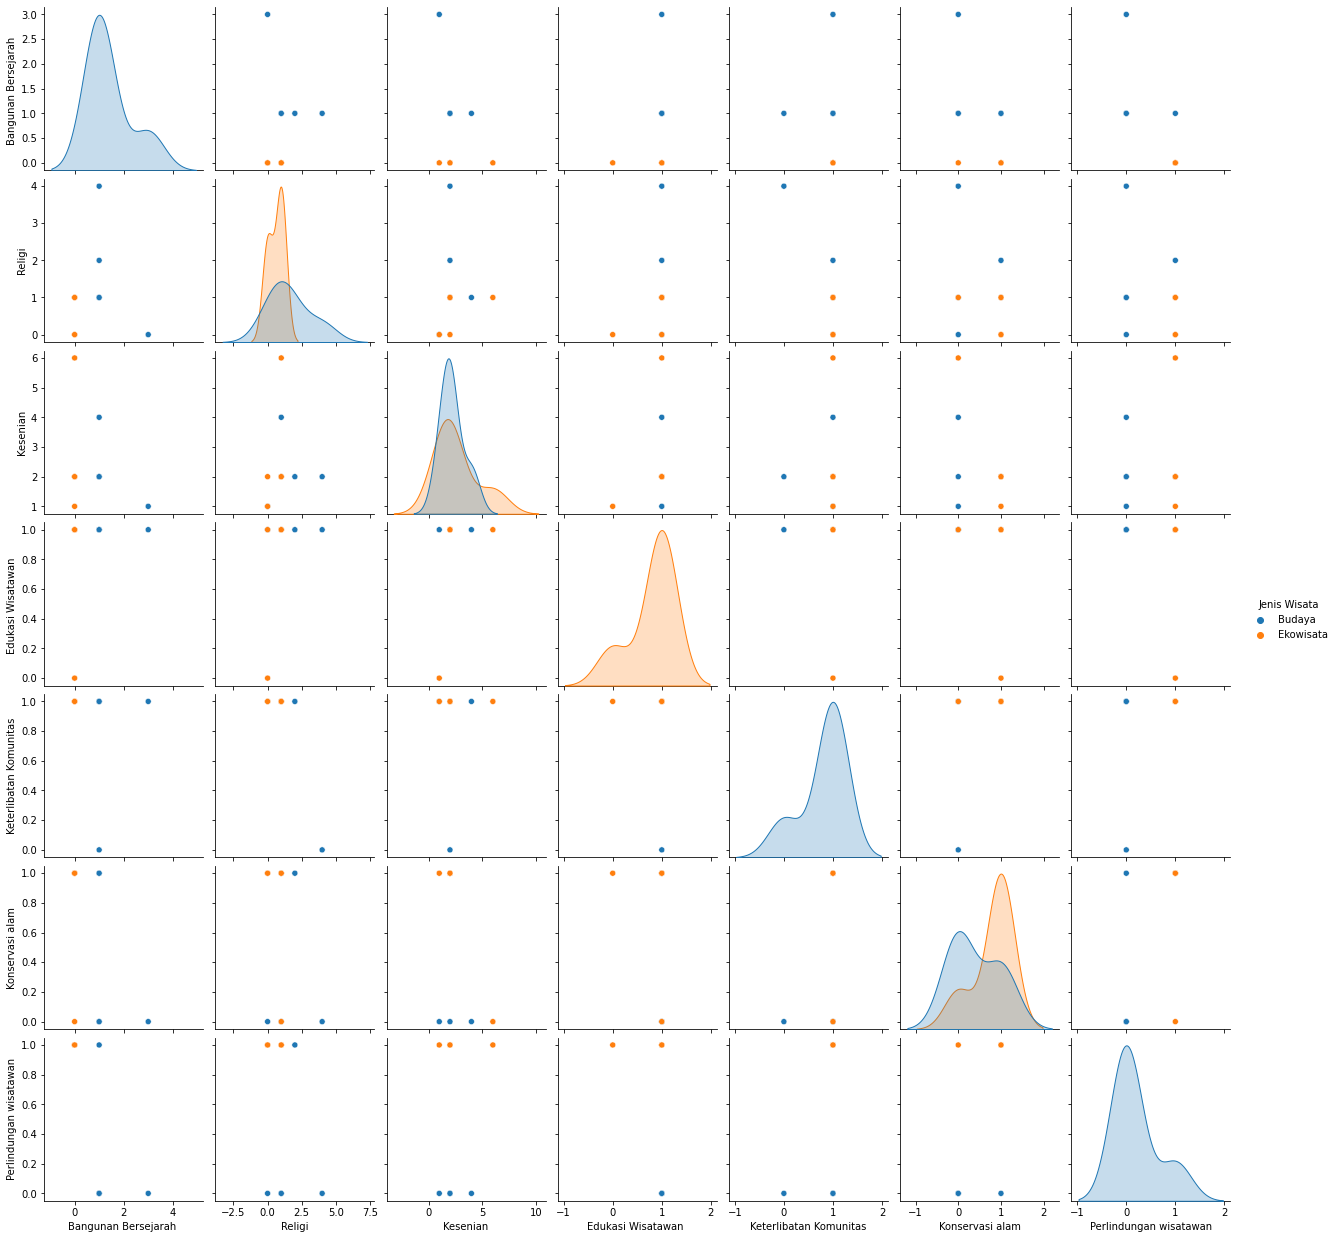

In [5]:
display("Dataset visualization")
sns.pairplot(train_modal, hue='Jenis Wisata')

In [6]:
# Splitting axis
values = train_modal.values
X = values[:,:-1]
Y = values[:,-1]
columns = train_modal.columns[:-1]

# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(jumlah_kolom_modal, 2) # Reshape of having jumlah_kolom features for 2 classes
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns))

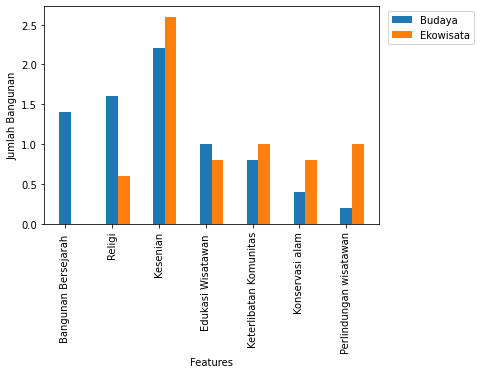

In [7]:
# Plot the average values into a bar chart
width = 0.25
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Budaya')
plt.bar(X_axis + width, Y_Data_reshaped[1], width, label = 'Ekowisata')
plt.xticks(X_axis, columns[:], rotation=90)
plt.xlabel("Features")
plt.ylabel("Jumlah Bangunan")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## Model Training and Evaluation

In [21]:
## Model Training
arr_accuracy = []
accuracy = 0
for i in range(25):
    # Splitting train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y)

    # Support vector machine algorithm
    svn = SVC(kernel = 'rbf')
    svn.fit(X_train, y_train)

    # Predict from the test dataset
    predictions = svn.predict(X_test)

    # Calculate the accuracy
    new_accuracy = accuracy_score(y_test, predictions)
    arr_accuracy.append(new_accuracy)
    if(accuracy < new_accuracy): accuracy = new_accuracy
    # if(accuracy == 1): break

display(f"Highest accuracy : {accuracy}")

'Highest accuracy : 1.0'

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Budaya       1.00      1.00      1.00         1
   Ekowisata       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Model Prediction

In [ ]:
X_new = test_data.iloc[:,4:11].values
prediction = svn.predict(X_new)
speciments = test_data.index
for i in range(len(speciments)):
    print(f"Prediction of {speciments[i]} : {prediction[i]}")

Prediction of Mekarsari Gambung : Budaya
